# TP

## Objectif
Analyse complète d'un dataset de transport urbain avec **les 3 bibliothèques**.

## Consignes

**Partie 1 - Matplotlib**
Dashboard 2×1 : évolution du nombre de trajets + distribution des durées (histogramme)

**Partie 2 - Seaborn**
Boxplot des tarifs par type de transport

**Partie 3 - Plotly**
Ligne du nombre de trajets mensuels + Scatter 3D (quantité x prix x montant)

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [38]:
np.random.seed(2025)
n_trajets = 1000

types_transport = ['Métro', 'Bus', 'Tram', 'Train', 'Vélo', 'Trottinette']
zones = ['Zone 1', 'Zone 2', 'Zone 3', 'Zone 4', 'Zone 5']

df_transport = pd.DataFrame({
    'Date': pd.date_range('2023-01-01', periods=n_trajets, freq='8H'),
    'Type_Transport': np.random.choice(types_transport, n_trajets, p=[0.3, 0.25, 0.15, 0.15, 0.10, 0.05]),
    'Tarif': np.random.gamma(3, 1.5, n_trajets),
    'Duree_Minutes': np.random.poisson(25, n_trajets) + 5,
    'Zone': np.random.choice(zones, n_trajets),
    'Heure_Pointe': np.random.choice(['Oui', 'Non'], n_trajets, p=[0.4, 0.6])
})

df_transport['Tarif'] = df_transport['Tarif'].clip(1, 15).round(2)
df_transport['Duree_Minutes'] = df_transport['Duree_Minutes'].clip(5, 90)
df_transport['Mois'] = df_transport['Date'].dt.to_period('M').astype(str)

print("Dataset Transport Urbain")
print(f"Dimensions: {df_transport.shape}")
print(f"Revenu total: {df_transport['Tarif'].sum():,.2f}€")
print(f"Durée moyenne: {df_transport['Duree_Minutes'].mean():.2f} min")
print(df_transport.head())

Dataset Transport Urbain
Dimensions: (1000, 7)
Revenu total: 4,611.73€
Durée moyenne: 30.23 min
                 Date Type_Transport  Tarif  Duree_Minutes    Zone  \
0 2023-01-01 00:00:00          Métro   3.04             28  Zone 3   
1 2023-01-01 08:00:00           Vélo   3.98             27  Zone 2   
2 2023-01-01 16:00:00           Vélo   3.49             24  Zone 2   
3 2023-01-02 00:00:00            Bus  12.23             17  Zone 4   
4 2023-01-02 08:00:00            Bus   2.83             34  Zone 2   

  Heure_Pointe     Mois  
0          Non  2023-01  
1          Non  2023-01  
2          Non  2023-01  
3          Oui  2023-01  
4          Oui  2023-01  


C:\Users\Administrateur\AppData\Local\Temp\ipykernel_13592\1974022452.py:8: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



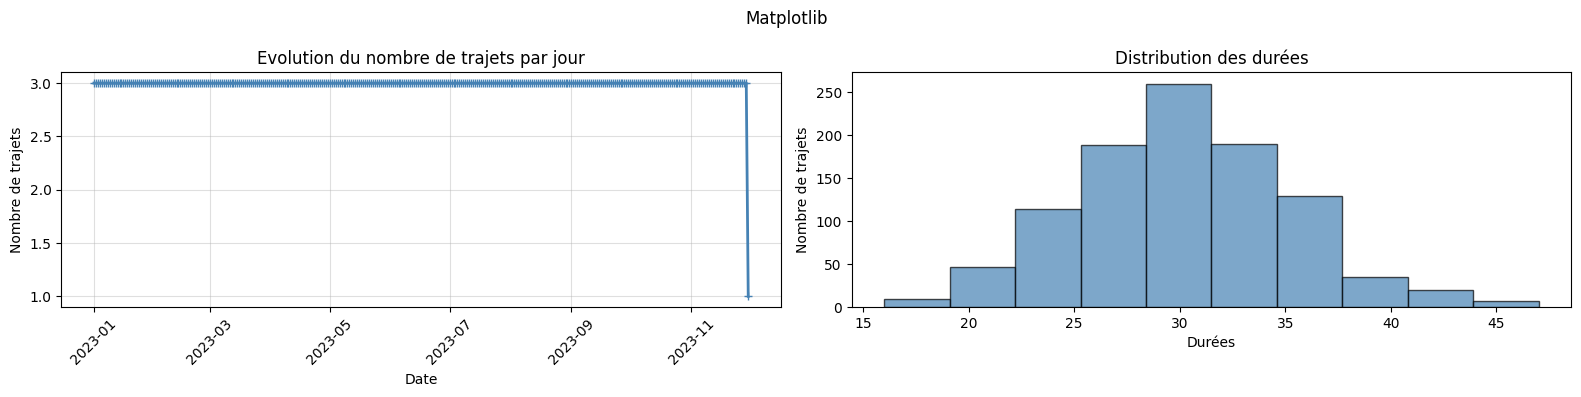

In [47]:
df_transport["Date_YYYYMMDD"] = df_transport["Date"].dt.date
evo_nb_trajet = df_transport.groupby("Date_YYYYMMDD").size()

plt.figure(figsize=(16,4))
plt.suptitle("Matplotlib")

plt.subplot(1, 2, 1)
plt.plot(evo_nb_trajet.index, evo_nb_trajet.values, color="steelblue", linestyle="solid", linewidth=2, marker="+")
plt.title("Evolution du nombre de trajets par jour")
plt.xlabel("Date")
plt.ylabel("Nombre de trajets")
plt.xticks(rotation=45)
plt.grid(True, alpha=0.4)

plt.subplot(1, 2, 2)
plt.hist(df_transport["Duree_Minutes"],color="steelblue", edgecolor="black", alpha=0.7)
plt.title("Distribution des durées")
plt.xlabel("Durées")
plt.ylabel("Nombre de trajets")

plt.tight_layout()

Text(0, 0.5, 'Tarif')

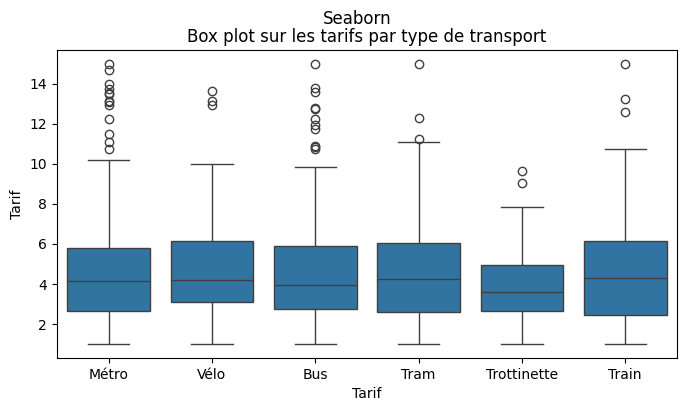

In [40]:
plt.figure(figsize=(8,4))
plt.suptitle("Seaborn")
sns.boxplot(data=df_transport, x="Type_Transport", y="Tarif")
plt.title("Box plot sur les tarifs par type de transport")
plt.xlabel("Tarif")
plt.ylabel("Tarif")

In [ ]:
df_transport["Year_Month"] = df_transport["Date"].dt.to_period('M')
evo_nb_trajet_year_month = df_transport.groupby("Mois").size()

fig = px.line(evo_nb_trajet_year_month, x=evo_nb_trajet_year_month.index, y=evo_nb_trajet_year_month.values, title="Evolution du nombre de trajet par mois", markers=True)
fig.update_layout(hovermode="x unified", xaxis_tickangle=-45)

Mois
2023-01    93
2023-02    84
2023-03    93
2023-04    90
2023-05    93
dtype: int64


In [51]:
fig = px.scatter_3d(df_transport, x="Tarif", y="Duree_Minutes", z="Type_Transport", color="Zone", title="Graph 3D")
fig.update_layout()